 ## <a id='0'> **1. ANÁLISIS EXPLORATORIO DE DATOS (EDA) - NFL 🏈** </a>
##### *THE BRIDGE - DATA_SCIENCE 2023*
 <a id='0'> ![Cover](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/Eda_cover.png)</h1>

## <a id='1'> *ÍNDICE:* </a>
---
- [1. Introducción:](#3)
    - [1.1. Hipótesis](#11)
    - [1.2. Limpieza de datos](5#)
        - [1.2.1 ](44#)
        - [1.2.3 Visualización](123#)
- [2. Conclusiones](#4)

-----
####  *Contacto*:
*Aquí podrás encontrar mi perfil personal*:
-   [LinkedIn](https://www.linkedin.com/in/ivancorderoc/) ![LinkedIn](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/linkedin.png)

*Para dudas y consultas*:
-   [Gmail](ivan.corderocueva@gmail.com) ![Gmail](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/gmail.png)

*Mi baúl con todos mis proyectos:
-   [GitHub](https://github.com/ivancorderoc) ![GitHub](/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/img/github.png)
-----

# <a id='3'>1. Introducción</a>

#### Este estudio se ha realizado gracias a una libreria dedica a la NFL y a Wikipedia.

La idea fundamental del proyecto es dilucidar si el estar sano influye significativamnete en el éxito de jugador. 
Así como también si a pesar de esas lesiones su grado de desempeño en el campo le permite ser un jugador referente.

 ### <a id='4'> ***1.1 Hipótesis.*** </a>

1.  **¿Cuál es la relación entre lesiones y éxito en la NFL?**
2.  **¿Las consideras lesiones severas son las más habituales?**
3.  **¿Las lesiones leves pueden terminar con la carrera de los profesionales?**    
4.  **¿En qué época de la temporada regular existen más lesiones?**
5.  **¿Cuál es la posición que tiende lesionarse?**
6.  **¿Qué hace la NFL para intentar reducir el número de lesiones para que no acaben con la carrera/vida de los jugadores? *(pregunta a futuro)***


 ### <a id='4'> ***1.1 Limpieza de datos.*** </a>

**Presentación de nuestros datasets**.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

In [35]:
# Asignamos variables a los datasets con los que vamos a trabajar.
ranks_nfl = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/processed/ranks_nfl.csv")
injuries = pd.read_csv("/Users/ivanlamb/Desktop/Workspace/eda_nfl/src/data/processed/injuries.csv")

In [36]:
ranks_nfl.head(10)

,Rank,Player,Position,2010 Team,2011 Team,Reference,Year,2012 Team,Rank Change,2013 Team,2014 Team,2015 Team,2015 team,2016 team,Rank change,2017 team,Year accomplishments,2018 team,2019 team,2020 team
0,1,Tom Brady,Quarterback,New England Patriots,NaN,1.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Peyton Manning,Quarterback,Indianapolis Colts,NaN,2.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Adrian Peterson,Running back,Minnesota Vikings,NaN,3.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Ray Lewis,Linebacker,Baltimore Ravens,NaN,4.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Ed Reed,Safety,Baltimore Ravens,NaN,5.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Troy Polamalu,Safety,Pittsburgh Steelers,NaN,6.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Andre Johnson,Wide receiver,Houston Texans,NaN,7.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Darrelle Revis,Cornerback,New York Jets,NaN,8.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Drew Brees,Quarterback,New Orleans Saints,NaN,9.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Julius Peppers,Defensive end,Chicago Bears,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Vemos la informacion que nos da el *primer dataset*
print(ranks_nfl.shape)
print(ranks_nfl.info())

(1000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  1000 non-null   int64  
 1   Player                1000 non-null   object 
 2   Position              1000 non-null   object 
 3   2010 Team             100 non-null    object 
 4   2011 Team             108 non-null    object 
 5   Reference             974 non-null    object 
 6   Year                  1000 non-null   float64
 7   2012 Team             105 non-null    object 
 8   Rank Change           400 non-null    object 
 9   2013 Team             111 non-null    object 
 10  2014 Team             106 non-null    object 
 11  2015 Team             9 non-null      object 
 12  2015 team             100 non-null    object 
 13  2016 team             105 non-null    object 
 14  Rank change           500 non-null    object 
 15  2017 team  

In [38]:
# Vemos los unicos de cada columna
print(ranks_nfl.nunique())

Rank                    100
Player                  403
Position                 20
2010 Team                30
2011 Team                34
Reference               274
Year                     10
2012 Team                32
Rank Change              68
2013 Team                33
2014 Team                31
2015 Team                 8
2015 team                32
2016 team                30
Rank change              68
2017 team                29
Year accomplishments    303
2018 team                32
2019 team                33
2020 team                14
dtype: int64


In [39]:
injuries.head(10)

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2010.0,REG,ARI,1.0,00-0027007,RB,Chris Wells,Chris,Wells,Knee,NaN,Questionable,Knee,NaN,Did Not Participate In Practice,2010-09-10 12:13:53
1,2010.0,REG,ARI,1.0,00-0022288,RB,Jason Wright,Jason,Wright,Toe,NaN,Questionable,Toe,NaN,Limited Participation in Practice,2010-09-10 12:13:44
2,2010.0,REG,ARI,1.0,00-0025668,CB,Michael Adams,Michael,Adams,Shoulder,NaN,Probable,Shoulder,NaN,Full Participation in Practice,NaN
3,2010.0,REG,ARI,1.0,00-0026939,LB,Will Davis,Will,Davis,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
4,2010.0,REG,ARI,1.0,00-0022921,WR,Larry Fitzgerald,Larry,Fitzgerald,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
5,2010.0,REG,ARI,1.0,00-0025602,TE,Ben Patrick,Ben,Patrick,Knee,NaN,Probable,Knee,NaN,Full Participation in Practice,NaN
6,2010.0,REG,ARI,1.0,00-0013126,LB,Joey Porter,Joey,Porter,Back,NaN,Probable,Back,NaN,Full Participation in Practice,NaN
7,2010.0,REG,ARI,1.0,00-0027691,WR,Andre Roberts,Andre,Roberts,Shoulder,NaN,Probable,Shoulder,NaN,Full Participation in Practice,NaN
8,2010.0,REG,ATL,1.0,00-0022781,WR,Michael Jenkins,Michael,Jenkins,Shoulder,NaN,Out,Shoulder,NaN,Did Not Participate In Practice,2010-09-10 12:53:27
9,2010.0,REG,ATL,1.0,00-0024183,CB,Brent Grimes,Brent,Grimes,Hip,NaN,Questionable,Hip,NaN,Full Participation in Practice,2010-09-10 12:52:50


In [40]:
# Vemos la informacion que nos da el *segundo* dataset*
print(injuries.shape)
print(injuries.info())

(51119, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51119 entries, 0 to 51118
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     51119 non-null  float64
 1   game_type                  51119 non-null  object 
 2   team                       51119 non-null  object 
 3   week                       51119 non-null  float64
 4   gsis_id                    51119 non-null  object 
 5   position                   51119 non-null  object 
 6   full_name                  51119 non-null  object 
 7   first_name                 51119 non-null  object 
 8   last_name                  51119 non-null  object 
 9   report_primary_injury      39778 non-null  object 
 10  report_secondary_injury    2145 non-null   object 
 11  report_status              39778 non-null  object 
 12  practice_primary_injury    51074 non-null  object 
 13  practice_secondary_injury  2773 no

In [41]:
# Vemos los unicos de cada columna

print(injuries.nunique())

season                          10
game_type                        5
team                            34
week                            21
gsis_id                       4470
position                        17
full_name                     4416
first_name                    1575
last_name                     2522
report_primary_injury          164
report_secondary_injury        103
report_status                    4
practice_primary_injury        194
practice_secondary_injury      130
practice_status                  5
date_modified                31553
dtype: int64


### **Limpieza de nuestros datasets**
-   Primer dataset:

In [42]:
# Eliminamos todas las columnas innecesarias y las organizamos.

ranks_nfl = ranks_nfl.reindex(columns=["Rank", "Player", "Position", "Year"])

In [43]:
# Cambiamos los nombres en nuestra columna "Position"

ranks_nfl["Position"].replace({"Wide Receiver":"Wide receiver",
                              "Fullback":"Running back",
                              "Strong safety":"Safety",
                              "Free safety":"Safety",
                              "Outside linebacker":"Linebacker",
                              "Offensive Tackle" :"Offensive tackle",
                              "Defensive Tackle":"Defensive tackle"}, inplace=True)

-   Segundo dataset:

In [44]:
# Procedemos a eliminar columnas que no son importantes y de paso estandarizamos varios los nombres de las columnas
injuries.drop(columns=["gsis_id", 
                       "first_name",
                       "last_name",
                       "report_secondary_injury",
                       "practice_secondary_injury",
                       "date_modified"],
              inplace=True)
injuries.rename(columns={'season':'Year',
                         'game_type':'Season',
                         'team':'Team',
                         'position':'Position',
                         'full_name': 'Player',
                         'week': 'Week'},
                inplace=True)

In [45]:
# eliminamos los valores faltantes y vemos como se va reduciendo nuestro dataset

injuries.dropna(inplace=True)
injuries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39733 entries, 0 to 51111
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     39733 non-null  float64
 1   Season                   39733 non-null  object 
 2   Team                     39733 non-null  object 
 3   Week                     39733 non-null  float64
 4   Position                 39733 non-null  object 
 5   Player                   39733 non-null  object 
 6   report_primary_injury    39733 non-null  object 
 7   report_status            39733 non-null  object 
 8   practice_primary_injury  39733 non-null  object 
 9   practice_status          39733 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.3+ MB


In [46]:
# Nos centraremos en jugadores que realmente están reportados como lesionados

injuries = injuries.loc[(injuries["practice_status"]== injuries["practice_status"].unique()[0]) | (injuries["practice_status"]== injuries["practice_status"].unique()[-1]) ]

In [47]:
# Nuestro análisis se centrará en la temporada regular

injuries = injuries[injuries["Season"].str.contains("REG")]

In [48]:
# Limpiamos la columna "Position"

injuries["Position"].replace({"LB":"Linebacker",
                              "WR":"Wide receiver",
                              "CB":"Cornerback",
                              "RB":"Running back",
                              "S":"Safety",
                              "DE":"Defense end",
                              "T":"Offensive tackle",
                              "DT":"Defensive tackle",
                              "TE": "Tight end",
                              "G": "Guard",
                              "QB":"Quarterback",
                              "C": "Center",
                              "K": "Kicker",
                              "P": "Punter",
                              "LS":"Long snapper",
                              "KR": "Kicker returner",
                              "PR":"Punt returner",}, inplace=True)


In [49]:
# Estandarizamos nuestras columnas para dejarlas en una categoría correspondiente.

injuries["report_primary_injury"].replace({"left Shoulder":"Shoulder",
                                   "right Shoulder":"Shoulder",
                                   "Right Shoulder":"Shoulder",
                                   "migraines":"Migraines",
                                   "(migraines)":"Migraines",
                                   "left Groin":"Groin",
                                   "right Groin":"Groin",
                                   "left Forearm":"Forearm",
                                   "right Knee":"Knee",
                                   "left Knee":"Knee",
                                   "right Finger":"Finger",
                                   "right hip":"Hip",
                                   "Quadricep":"Quadriceps",
                                   "right Quadricep":"Quadriceps",
                                   "rt. thumb":"Thumb",
                                   "right Thumb":"Thumb",
                                   "left Calf": "Calf",
                                   "right Calf": "Calf",
                                   "groin, knee, ankle": "Multiple",
                                   "Shoulder, Finger": "Multiple",
                                   "Bicep":"Biceps",
                                   "right Elbow": "Elbow",
                                   "Core": "Core Muscle",
                                   "Core Muscle Injury": "Core Muscle",
                                   "Right Collarbone": "Collarbone",
                                   "Medical Illness":"Illness",
                                   "left Wrist": "Wrist",
                                   "right Hamstring":"Hamstring",
                                   "Triceps":"Triceps",
                                   "right Hip":"Hip",}, inplace=True)


injuries["practice_primary_injury"].replace({"left Shoulder":"Shoulder",
                                   "right Shoulder":"Shoulder",
                                   "Right Shoulder":"Shoulder",
                                   "migraines":"Migraines",
                                   "(migraines)":"Migraines",
                                   "left Groin":"Groin",
                                   "right Groin":"Groin",
                                   "left Forearm":"Forearm",
                                   "right Knee":"Knee",
                                   "left Knee":"Knee",
                                   "right Finger":"Finger",
                                   "right hip":"Hip",
                                   "Quadricep":"Quadriceps",
                                   "right Quadricep":"Quadriceps",
                                   "rt. thumb":"Thumb",
                                   "right Thumb":"Thumb",
                                   "left Calf": "Calf",
                                   "right Calf": "Calf",
                                   "groin, knee, ankle": "Multiple",
                                   "Shoulder, Finger": "Multiple",
                                   "Bicep":"Biceps",
                                   "right Elbow": "Elbow",
                                   "Core": "Core Muscle",
                                   "Core Muscle Injury": "Core Muscle",
                                   "Right Collarbone": "Collarbone",
                                   "Medical Illness":"Illness",
                                   "left Wrist": "Wrist",
                                   "right Hamstring":"Hamstring",
                                   "Triceps":"Triceps",
                                   "right Hip":"Hip",
                                   "oblique": "Oblique"}, inplace=True)

In [50]:
# Comprobamos el estado de nuestro dataset

injuries.iloc[[7]]

,Year,Season,Team,Week,Position,Player,report_primary_injury,report_status,practice_primary_injury,practice_status
20,2010.0,REG,BUF,1.0,Linebacker,Reggie Torbor,Chest,Out,Chest,Did Not Participate In Practice


In [51]:
# Procedemos dejarlo con índice correcto

injuries.reset_index(drop=True, inplace=True)

###  **Análisis univariante**

Como podemos observar nuestros datasets fudamentalmente se caracterizan por ser de tipo categórico. Procedemos a valorar.

-   Primer dataset:

In [52]:
pos_rank = ranks_nfl["Position"].value_counts()
print(pos_rank)

Wide receiver       166
Quarterback         140
Linebacker          134
Running back        111
Defensive end       106
Cornerback           78
Safety               62
Defensive tackle     62
Tight end            54
Offensive tackle     49
Guard                25
Center               12
Kicker                1
Name: Position, dtype: int64


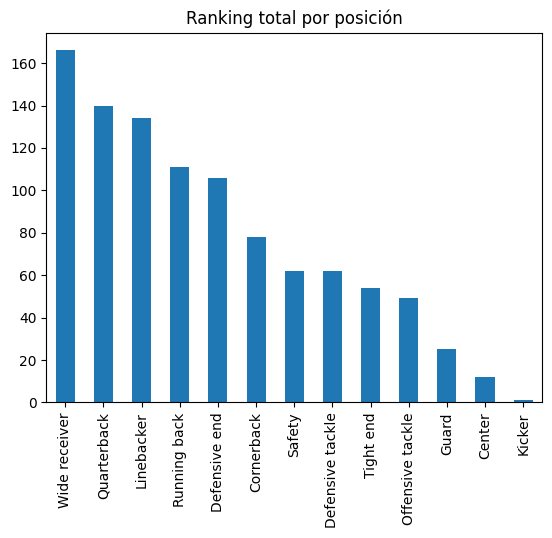

In [58]:
# Hacemos una pequeña visualización

pos_rank.plot(kind='bar', title= "Ranking total por posición");


-   Segundo dataset:

In [118]:
report = injuries[["Week"]].value_counts()
print(report)

Week
3.0     849
5.0     840
4.0     826
13.0    804
6.0     796
7.0     796
14.0    794
17.0    785
12.0    779
15.0    778
11.0    723
8.0     716
2.0     708
10.0    698
9.0     693
16.0    682
1.0     544
dtype: int64


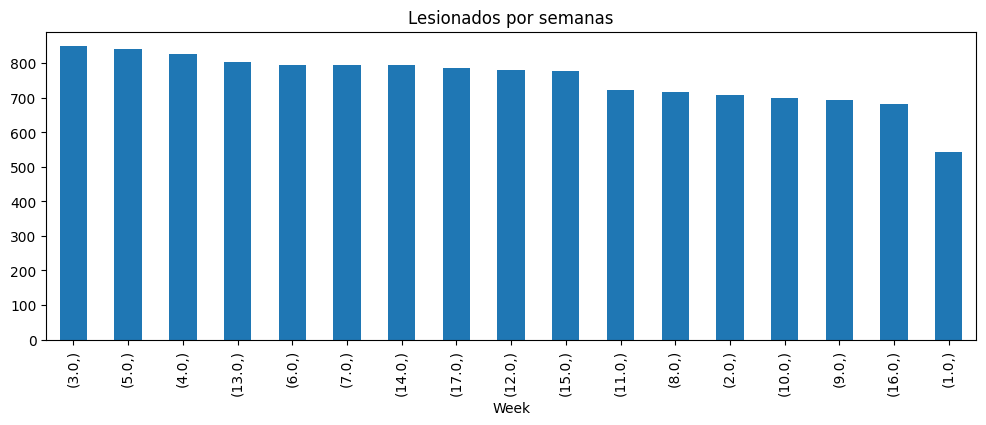

In [120]:
plt.figure(figsize=(12, 4))
report.plot(kind='bar', title= "Lesionados por semanas");

###  **Análisis bivariante**

Empezamos a buscar relaciones en nuestros dataset

In [90]:
cross_tab = pd.crosstab(index = injuries.Year, columns=injuries.Position)
cross_tab_matrix = np.array(cross_tab)

In [95]:
media_pos = cross_tab.median()
media_pos

Position
Center               30.5
Cornerback          165.5
Defense end         100.5
Defensive tackle     80.5
Guard                72.5
Kicker                7.0
Kicker returner       0.0
Linebacker          199.5
Long snapper          1.5
Offensive tackle    101.0
Punt returner         0.0
Punter                3.0
Quarterback          34.5
Running back        120.5
Safety              108.0
Tight end            85.0
Wide receiver       155.5
dtype: float64

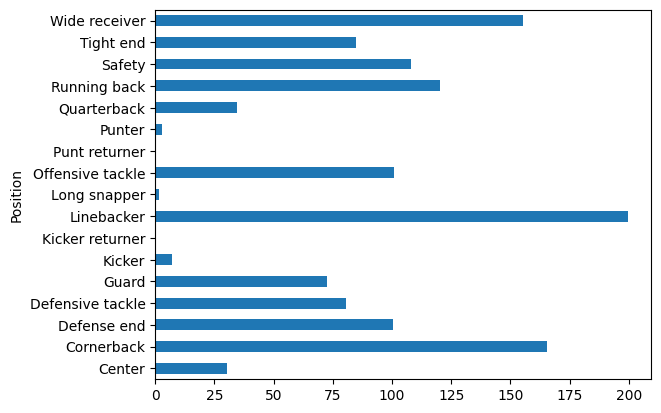

In [96]:
media_pos.plot(kind = 'barh');

In [98]:
cross_tab.iloc[0]

Position
Center               25
Cornerback          173
Defense end         116
Defensive tackle     76
Guard                63
Kicker               17
Kicker returner       1
Linebacker          206
Long snapper          1
Offensive tackle    106
Punt returner         0
Punter                2
Quarterback          59
Running back        122
Safety              105
Tight end            73
Wide receiver       153
Name: 2010.0, dtype: int64

<Figure size 2000x400 with 0 Axes>

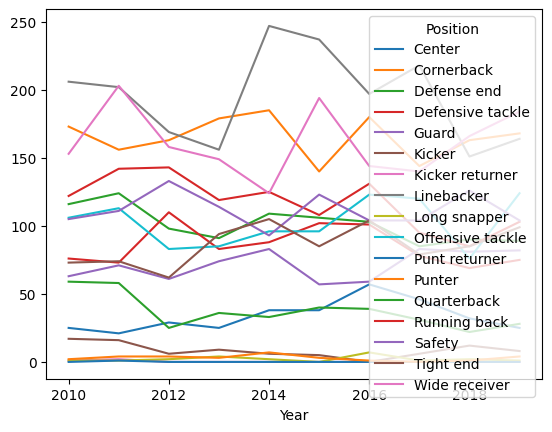

In [106]:
plt.figure(figsize=(20, 4));
cross_tab.plot();

plano general de las lesiones anualmente 

In [99]:
cross_tab.value_counts()

Center  Cornerback  Defense end  Defensive tackle  Guard  Kicker  Kicker returner  Linebacker  Long snapper  Offensive tackle  Punt returner  Punter  Quarterback  Running back  Safety  Tight end  Wide receiver
21      156         124          73                71     16      2                202         1             113               1              4       58           142           111     74         203              1
25      168         89           75                82     8       0                164         1             124               0              4       28           103           104     99         184              1
        173         116          76                63     17      1                206         1             106               0              2       59           122           105     73         153              1
        179         91           83                74     9       0                156         4             85                0              3  

In [101]:
# Realizar la prueba chi-cuadrado
estadistico, p_valor, grados_libertad, esperados = chi2_contingency(cross_tab_matrix)

# Mostrar los resultados
print("Estadístico chi-cuadrado:", estadistico)
print("Valor p:", p_valor)
print("Grados de libertad:", grados_libertad)
print("Tabla de frecuencias esperadas:\n", esperados)

Estadístico chi-cuadrado: 358.73312022510083
Valor p: 2.5373371502175882e-20
Grados de libertad: 144
Tabla de frecuencias esperadas:
 [[3.40432441e+01 1.67277964e+02 1.02433690e+02 8.66278979e+01
  7.23418937e+01 8.61213020e+00 3.03957536e-01 1.97268441e+02
  2.12770276e+00 1.03548201e+02 1.01319179e-01 2.93825619e+00
  3.75894153e+01 1.18847397e+02 1.13173523e+02 8.71344938e+01
  1.63630474e+02]
 [3.59840762e+01 1.76814612e+02 1.08273515e+02 9.15666224e+01
  7.64661619e+01 9.10311451e+00 3.21286395e-01 2.08514870e+02
  2.24900476e+00 1.09451565e+02 1.07095465e-01 3.10576848e+00
  3.97324175e+01 1.25622980e+02 1.19625634e+02 9.21020998e+01
  1.72959176e+02]
 [3.26794161e+01 1.60576536e+02 9.83300289e+01 8.31574428e+01
  6.94437593e+01 8.26711420e+00 2.91780501e-01 1.89365545e+02
  2.04246351e+00 9.93998907e+01 9.72601670e-02 2.82054484e+00
  3.60835220e+01 1.14086176e+02 1.08639607e+02 8.36437437e+01
  1.57075170e+02]
 [3.20237296e+01 1.57354695e+02 9.63571150e+01 8.14889548e+01
  6.80

In [102]:
# Seleccionamos el grado de significancia
alpha = 0.05

# Evaluación de p-valor en función del nivel de significación elegido
if p_valor < alpha:
    print("Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.")


Rechazar la hipótesis nula: no hay diferencia significativa entre las frecuencias esperadas y las observadas en las tablas de contingencia.


##### ***3. Fuentes***<a id='4'></a>
- Datasets: injuries: [Libreria NFL]("https://pypi.org/project/nfl-data-py/"), [Wikipedia]("https://en.wikipedia.org/wiki/NFL_Top_100")

## <a href ='#0'> 🔝 To the moon 🔝 </a>